In [151]:
import pandas as pd #Con pandas se hace el análisis, manipulación de datos y leer el archivo que contiene los datos
from sklearn.model_selection import train_test_split #Con train_test_split es una función que se usa para dividir los datos en 2 conjuntos, de entrenamiento y de prueba
#La libreria de metrics de sklearn incluye variedad de funciones para evaluar nuestro modelo
#Importamos funciones para calcular el accuracy, precision, f1 y recall. Además importamos una función para armar la matriz de confusión e identificar clasficaciones correctas, falsos negativos y falsos negativos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler  #De la libreria de preprocesamiento de sklearn importamos un escalados que transforma nuestras caracteristicas en un rango de 0 a 1, nos ayuda a evita problemas de escala en las diferentes variables
from sklearn.ensemble import GradientBoostingClassifier #Esta función implementa el algoritmo nombrado, es usado para problemas de clasificación, una de sus ventajas es que combina  varios modelos para crear un modleo robusto
import time #Esta biblioteca incluye funciones para medir el tiempo en python
import matplotlib.pyplot as plt #Esta es una de las principales bibliotecas de visualización en Python, se usa para crear gráficos y en este caso explicar los resultados
from mlxtend.evaluate import bias_variance_decomp #Esta función se utiliza para descomponer el MSE de un modelo en bias, variance y error
from sklearn.model_selection import learning_curve #Esta función es parte de scikit-learn, se utiliza para visualzar el rendimiento del modelo con tamaños de conjunto de entrenamiento variables
import numpy as np #Esta libreria se ocupa para realizar operaciones con arreglos y matrices, además implementa algunas operaciones matemáticas

In [152]:
colordict={'train':'teal','test':'skyblue','validation':'cornflowerblue'} #Este diccionario se ocupa para mantener coherencia en los colores con los que se representa cada conjunto en diferentes visualizaciones, la llave indica a que conjunto hace referencia y el valor es el nombre de un color compatible con matplotlib

In [153]:
print('Inicializando algoritmo de Gradient Boosting Classifier...') #Imprime un mensaje para que el usuario sepa que esta iniciando el programa
time.sleep(1) #Usamos sleep para espaciar ligeramente los print y se puedan leer
data = pd.read_csv('stroke_data.csv') #Usamos la función read:csv de pandas para leer el dataset que se usará
data.dropna(subset=['sex'],inplace=True) #Eliminamos los datos faltantes para evitar problemas
data = data.sample(n=5000,random_state=10,ignore_index=True) #Con la función de sample escogemos una muestra de 5000 elementos del dataset por motivos computacionales, con el parametro ignore index reasignamos los índices
print('Asegurese que es encuentra en la misma carpeta que el archivo .csv') #Pequeño mensaje, la idea es que se lea si el programa da error por no encontrar el archivo
time.sleep(1) #Esperamos un segundo para que se puedan leer los mensajes
X = data.drop('stroke', axis=1)  #Elimina la variable a predecir 'stroke' del conjunto x que contiene los predictores
y = data['stroke'] #Selecciona la variable objetivo, en este caso 'stroke'
#Se incializa el objeto escalador, esto para evitar que los resultados se distorcionen
escalar = MinMaxScaler() #Creación del objeto de escalamiento, usamos la función MinMaxScaler, todos los datos tomaran valores entre 0 y 1
#Imprimimos un pequeño mensaje para que el usuario sepa que se esta haciendo algo y no se trabo el programa
print('Entrenando...')

Inicializando algoritmo de Gradient Boosting Classifier...


Asegurese que es encuentra en la misma carpeta que el archivo .csv
Entrenando...


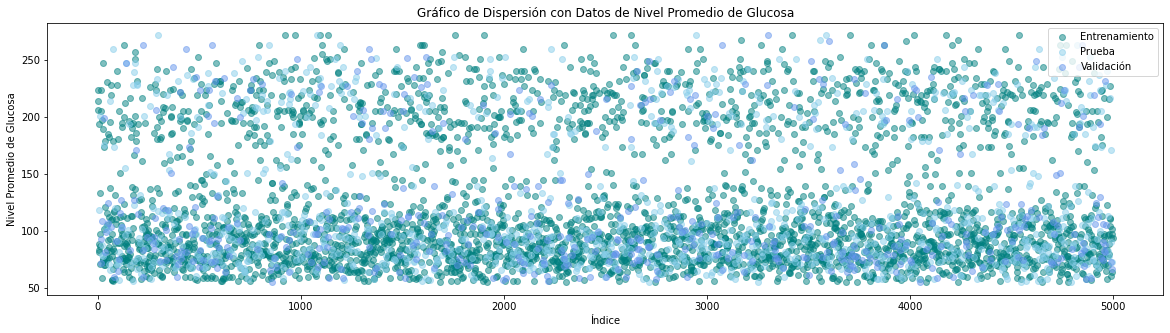

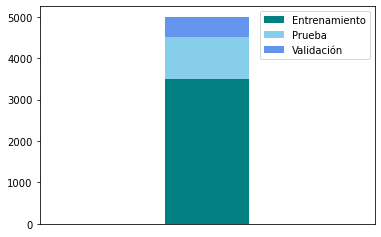

In [163]:
#Creamos los conjuntos de entrenamiento, prueba y validación
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=6) #División de los datos en 2 conjuntos entrenamiento y los demás dato serán usados para crear conjunto de prueba y validación. Se dividen 70-30, con esto nos aseguramos tener suficientes datos
X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size=0.33, random_state=6) #División de los datos restantes en 2 conjuntos, validación y prueba.

#Para visualizar la división de los datos se harán dos gráficos: Un scatter plot, 
# eligiendo una variable para gráficar y con los colores representantes de cada conjunto y, 
# se hace una gráfica de barras mostrando la proporción de los conjuntos

#El scatter plot se realiza de la siguiente manera:
fig,ax = plt.subplots(figsize=(20,5)) #Se inicializa la figura, así la podemos personalizar de mejor manera. Introducimos el tamaño que le daremos a la figura como parametro aquí
#Hacemos un scatter plot por cada conjunto(entrenamiento, prueba y validación)que tenemos
#Los hacemos sobre el mismo objeto 'ax' para que los gráficos se superpongan
#Pasamos como primer parámetro los índices y como segundo parametro el nivel de glucosa (esta es la variable que escogimos)
#Usando el diccionario de colores asignamos los colores represnetativos y agregamos la etiqueta correspondiente para completar el gráfico
ax.scatter(X_train.index, X_train['avg_glucose_level'] , label='Entrenamiento', color=colordict['train'], alpha=0.5)
ax.scatter(X_test.index, X_test['avg_glucose_level'], label='Prueba', color=colordict['test'], alpha=0.5)
ax.scatter(X_val.index, X_val['avg_glucose_level'], label='Validación', color=colordict['validation'], alpha=0.5)
# Siguiendo con la personalización del gráfico, agregamos:
plt.xlabel('Índice') #Con el método xlabel agregamos el título "Ìndice" al eje x, ayudando a la comprensión de la gráfica
plt.ylabel('Nivel Promedio de Glucosa') #Con el método ylabel agregamos el título "Nivel promedio de glucosa" al eje x, ayudando a la comprensión de la gráfica
plt.title('Scatter plot de los conjuntos de entrenamiento, prueba y validación basado en el valor promedio de glucosa') #Con el método .title agregamos el título a la gráfica
plt.legend() #Activamos que se muestre la leyenda que se basa en las etiquetas que definimos al pasar la información al gráfico
plt.show() #Mostramos el gráfico
plt.close()

#La gráfica de barras se realiza de la siguiente manera:
Xt_size, Xte_size, Xv_size = X_train.shape[0],X_test.shape[0], X_val.shape[0] #Extraemos el número de muestras que vienen en cada conjunto con el método shape[0], este argumento se usará como la altura de la barra
fig,ax = plt.subplots(figsize=(10,10)) #Se inicializa la figura, así la podemos personalizar de mejor manera. Introducimos el tamaño que le daremos a la figura como parametro aquí
#Hacemos una gráfica de barra por cada conjunto, como primer argumento pasamos la ubicación en x, en este caso es 0 por que se construyen sobre la misma barra
#El segundo argumento corresponde a la altura de la barra, pasamos el número de entradas que extrajimos anteirormente
#En el argumento width definimos el ancho de la barra, por estética lo fijamos en 1
#Finalmente usamos el diccionario de colores para asignar el color correspondiente al conjunto
ax.bar(0,Xt_size,label='Entrenamiento',width=1,color=colordict['train'])
ax.bar(0,Xte_size,label='Prueba',bottom=Xt_size,width=1,color=colordict['test']) #Usamos el ergumento bottom para stackear las columnas una sobre otra, pasamos primero el valor del conjunto de entrenamienot
ax.bar(0,Xv_size,label = 'Validación',bottom=Xt_size+Xte_size,width=1,color=colordict['validation']) #En el argumento bottom pasamos el numero de variables del conjunto de entrenamiento sumado al número de variables del conjunto de validación
ax.set_xlim(-2,2) #Con el método set_xlim fijamos el limite en -2 y 2 para mantener proproción en la figura, no afecta en nada más que en ela estética
ax.set_xticks([]) #Con esté método se pueden alterar los vlaores que se ven en el eje x, pasando un arrelgo vacio quitamos los valores
ax.legend() #Mostramos la leyenda basa en la etiquetas definidas al armar las barras
plt.show() #Finalmente se muestra la figura
plt.close()


In [155]:
#Crea un modelo de Gradient Boosting Classifier, usamos un learning rate bajo y suficientes estimadores para que el modelo se ajuste de la mejor manera, intentando evitar overfitting
gbc = GradientBoostingClassifier()#learning_rate=0.05,n_estimators=2000)
# Entrena el modelo en los datos de entrenamiento
gbc.fit(X_train, y_train)
#Calcula el puntaje (accuracy) del modelo entrenado usando el conjunto de prueba
print(f'Score en el conjunto de prueba: {gbc.score(X_test,y_test)}')
y_pred = gbc.predict(X_val) #Realizamos las predicciones con el modelo y pasando los datos del conjunto de validación
#Extraemos los resultados de las predicicones con diferentes métricas y los imprimos, usamos una precisión a 4 decimales para notar las pequeñas diferencias
accuracy,recall,precision,f1 = accuracy_score(y_val, y_pred), recall_score(y_val,y_pred) , precision_score(y_val,y_pred), f1_score(y_val,y_pred)
print(f'Accuracy en el conjunto de validación: {accuracy:.4f}') #Mostramos en terminal el puntaje que tiene calculando el accuracy
print(f'Recall en el conjunto de validación: {recall:.4f}') #Mostramos en terminal el puntaje que tiene calculando el recall
print(f'Precision en el conjunto de validación: {precision:.4f}') #Mostramos en terminal el puntaje que tiene calculando la precision
print(f'F1 en el conjunto de validación: {f1:.4f}') #Mostramos en terminal el puntaje que tiene calculando el f1 score
#Imprimimos la matriz de confusión para ver en que esta fallando el modelo y visualizar si tiene clasifica falsos positivos o falsos negativos o ninguno
print(f'Confusion Matrix: \n{confusion_matrix(y_val, y_pred)}')
time.sleep(4) #Se espera 4 segundos para que se puede ver la información quer se acaba de mostrar

Score en el conjunto de prueba: 0.791
Accuracy en el conjunto de validación: 0.7662
Recall en el conjunto de validación: 0.7536
Precision en el conjunto de validación: 0.7895
F1 en el conjunto de validación: 0.7711
Confusion Matrix: 
[[298  84]
 [103 315]]


Explicación modelo

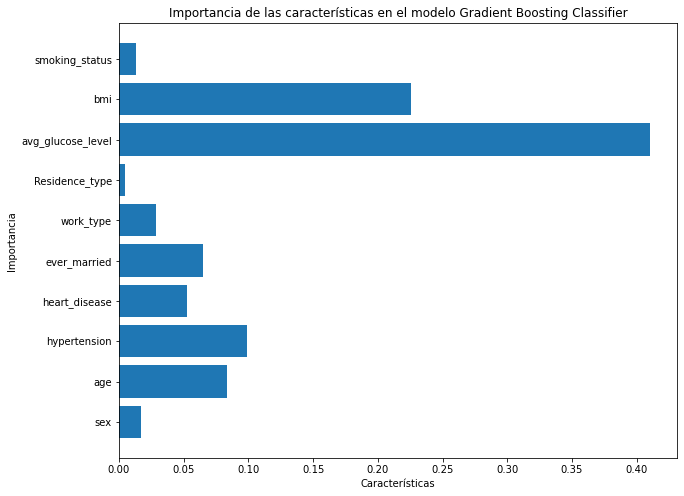

In [156]:
#Extraemos la importancia de cada predictor para ver variables el modelo considera más importantes e influyen más en la clasificación
feature_importances = gbc.feature_importances_
plt.figure(figsize=(10, 8)) #Inicializamos una figura con un tamaño de 10largox8alto donde se pondrá la gráfica
#Creamos un gráfico de barras horizontales, cada barra representa un predictor y los nombres en y corresponden al nombre del predictor que describe la barra
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Importancia') #Pone el nombre del eje X para ayudar a la comprensión de la gráfica
plt.ylabel('Características') #Pone el nombre del eje Y para ayudar a la compresión de la gráfica
plt.title('Peso de cada características en el modelo utilizando Gradient Boosting Classifier') #Incluye un titulo en la grafica
plt.show() #Muestra la figura
plt.close()

Bias y variance

In [159]:
#Con el método de numpy .array transformamos la estructura de los datos en arreglos de numpy, esto por la compatibilidad de la función posterior con esta estrucutra
X_train_ = np.array(X_train)
X_test_ = np.array(X_test)
y_train_ = np.array(y_train)
y_test_ = np.array(y_test)
#Usamos la función bias_variance_decomp para calcular el bias y varianza del modelo
#El bias nos ayuda a indicar si el modelo se ajusta bien a los datos de entenamiento
#La varianza nos sirve para medir la sensibilidad del modelo al ruido y medir el overfitting
loss, bias, var = bias_variance_decomp(gbc, X_train_, y_train_, X_test_, y_test_, loss='mse', num_rounds=5, random_seed=1)
#print('MSE: %.4f' % loss)
print('Bias: %.4f' % bias) #Imprimimos en terminal el valor del bias que obtuvimos
print('Variance: %.4f' % var) #Imprimos en terminal el valor de varianza que obtuvimos

MSE: 0.2172
Bias: 0.1663
Variance: 0.0509


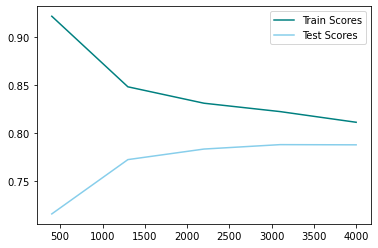

In [158]:
fig, ax = plt.subplots()
train_sizes, train_scores, test_scores = learning_curve(gbc, X, y)
ax.plot(train_sizes,np.mean(train_scores,axis=1),color=colordict['train'],label='Train Scores')
ax.plot(train_sizes,np.mean(test_scores,axis=1),color=colordict['test'],label='Test Scores')
#ax.set_xlim(500,4000)
ax.legend()